In [251]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
boston = load_boston()

/home/tomasz/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing d

In [252]:
print(boston.keys())
print(boston.data.shape)
print(boston.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
(506, 13)
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radi

In [253]:
X = boston.data
y = boston.target

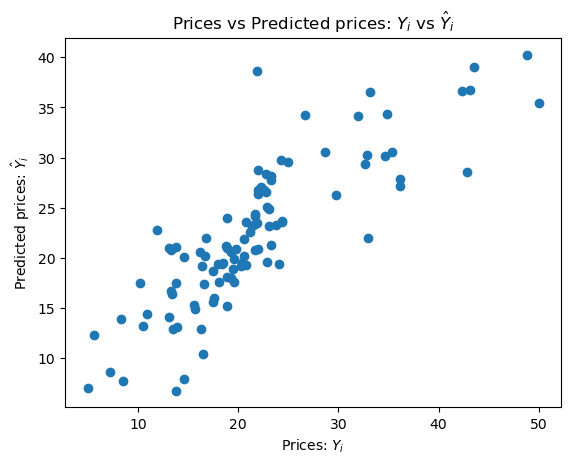

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)


plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [255]:
mean_squared_error(y_test, y_pred)

23.812245465080544

In [256]:
model.score(X_test,y_test)

0.6920749038652161

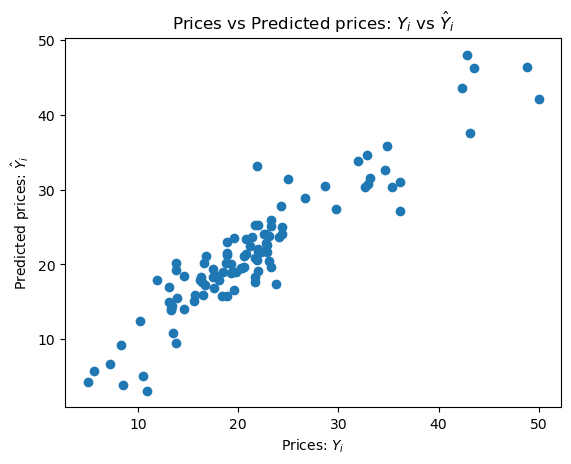

In [257]:
scaler = StandardScaler()
scale = scaler.fit_transform(X) 

polynomial_features= PolynomialFeatures(degree=2)
X_2 = polynomial_features.fit_transform(scale)

X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size=0.2, random_state=15)
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)


plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()



In [258]:
mean_squared_error(y_test, y_pred)

10.331478972995983

In [259]:
model.score(X_test,y_test)

0.8663997622299193

In [260]:
alphas = np.linspace(0.01,1,100)
lasso = Lasso(max_iter=1000000)
coefs = []
score = []
best = 0
best_alpha = 0

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    score.append(lasso.score(X_test,y_test))
    coefs.append(lasso.coef_)
    if lasso.score(X_test,y_test) > best:
        best = lasso.score(X_test,y_test)
        best_alpha = a

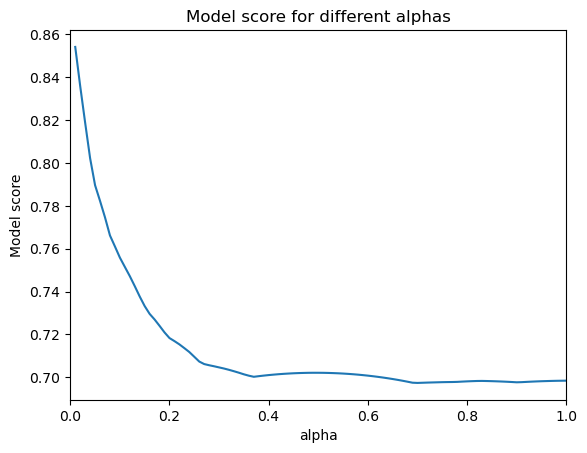

In [261]:
ax = plt.gca()
ax.plot(alphas, score)
plt.axis('tight')
plt.xlabel('alpha')
plt.xlim([0,1])
plt.ylabel('Model score')
plt.title('Model score for different alphas')
plt.show()

In [262]:
alphas = np.linspace(0.00005,1)
lasso = Lasso(max_iter=1000000)
coefs = []
score = []
best = 0
best_alpha = 0

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    score.append(lasso.score(X_test,y_test))
    coefs.append(lasso.coef_)
    if lasso.score(X_test,y_test) > best:
        best = lasso.score(X_test,y_test)
        best_alpha = a
    
    

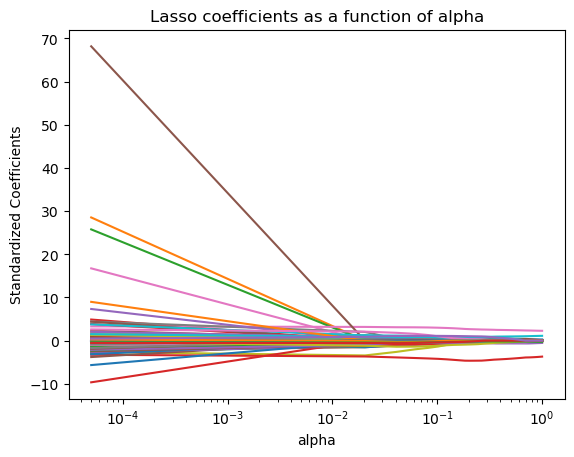

In [263]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha')
plt.show()

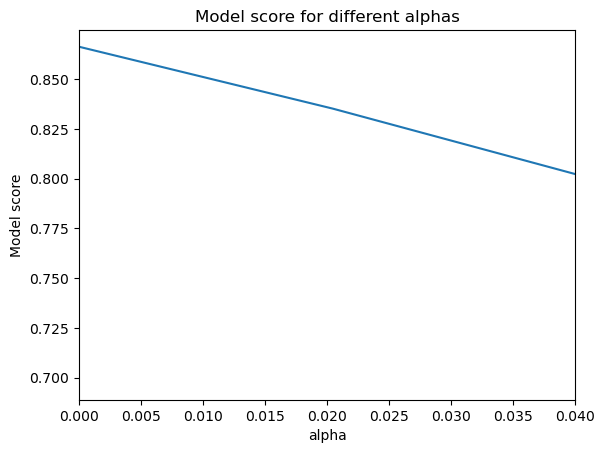

5e-05


In [264]:
ax = plt.gca()
ax.plot(alphas, score)
plt.axis('tight')
plt.xlabel('alpha')
plt.xlim([0,0.04])
plt.ylabel('Model score')
plt.title('Model score for different alphas')
plt.show()
print(best_alpha)

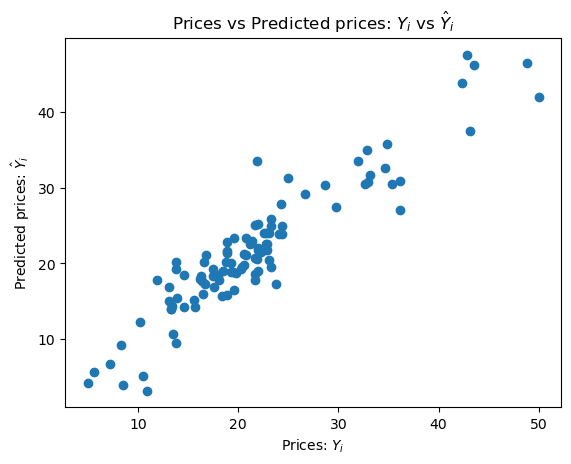

In [265]:
lasso_best_model = Lasso(alpha=best_alpha,max_iter=1000000)
lasso_best_model.fit(X_train,y_train)    
y_pred = lasso_best_model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()


In [266]:
mean_squared_error(y_test, y_pred)

10.343060827644313

In [267]:
lasso_best_model.score(X_test,y_test)

0.8662499929143276

In [268]:
alphas = np.linspace(0.0001,1)
ridge = Ridge(max_iter=1000000)
coefs = []
score = []
best = 0
best_alpha = 0

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    score.append(ridge.score(X_test,y_test))
    coefs.append(ridge.coef_)
    if ridge.score(X_test,y_test) > best:
        best = ridge.score(X_test,y_test)
        best_alpha = a

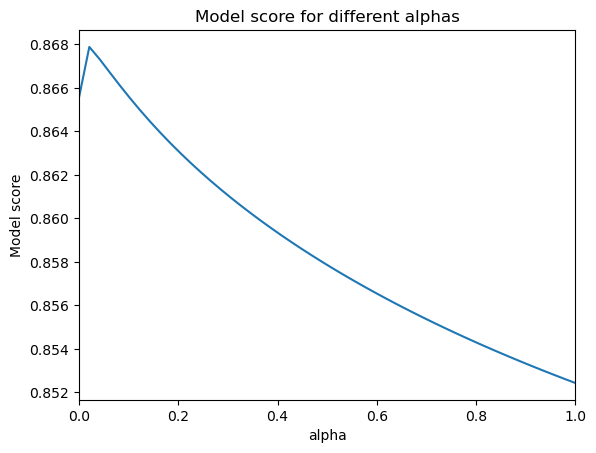

In [269]:
ax = plt.gca()
ax.plot(alphas, score)
plt.axis('tight')
plt.xlabel('alpha')
plt.xlim([0,1])
plt.ylabel('Model score')
plt.title('Model score for different alphas')
plt.show()


In [270]:
alphas = np.linspace(0.001,0.04,10000)
ridge = Ridge(max_iter=1000000)
coefs = []
score = []
best = 0
best_alpha = 0

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    score.append(ridge.score(X_test,y_test))
    coefs.append(ridge.coef_)
    if ridge.score(X_test,y_test) > best:
        best = ridge.score(X_test,y_test)
        best_alpha = a

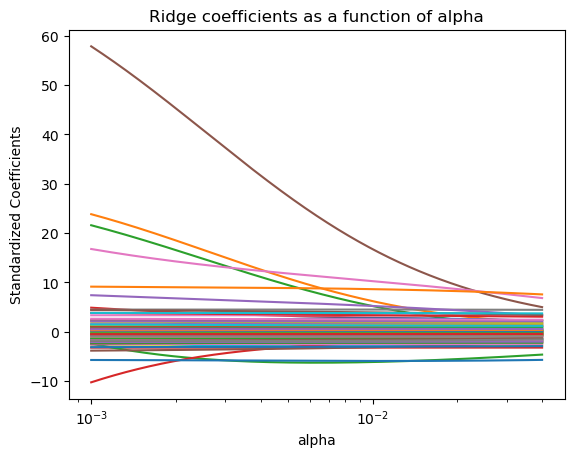

In [271]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Ridge coefficients as a function of alpha')
plt.show()

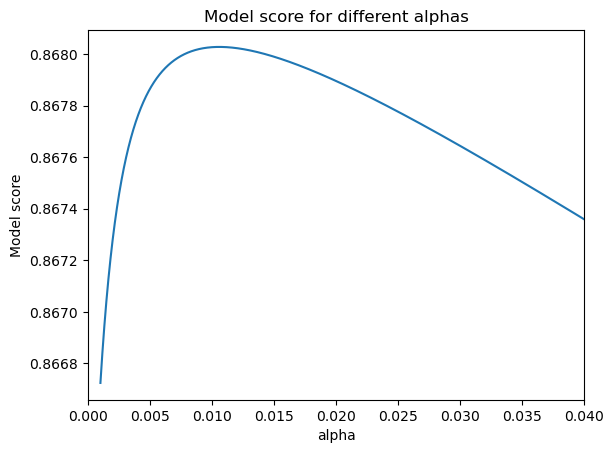

0.010587158715871587


In [272]:
ax = plt.gca()
ax.plot(alphas, score)
plt.axis('tight')
plt.xlabel('alpha')
plt.xlim([0,0.04])
plt.ylabel('Model score')
plt.title('Model score for different alphas')
plt.show()
print(best_alpha)

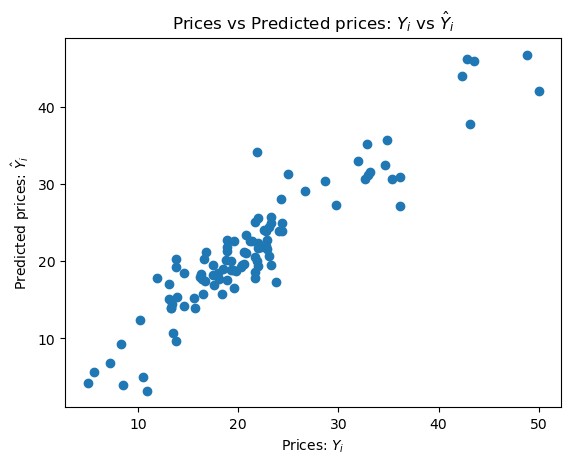

In [273]:
ridge_best_model = Ridge(alpha=best_alpha,max_iter=200000)
ridge_best_model.fit(X_train,y_train)    
y_pred = ridge_best_model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [274]:
mean_squared_error(y_test, y_pred)

10.205532493947057

In [275]:
ridge_best_model.score(X_test,y_test)

0.8680284234885078

In [276]:
from sklearn.datasets import load_breast_cancer

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
 
df = pd.DataFrame(data.data)
X = df.values
y = data.target
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)
model = LogisticRegression(penalty='l2',max_iter=1000000).fit(X_train, y_train)

model.score(X_test, y_test)

0.8947368421052632

In [284]:
c = np.linspace(0.0001,1,100)
model = LogisticRegression(penalty='l2',max_iter=1000000)
score = []
best = 0
best_c = 0

for c_value in c:
    model.set_params(C=c_value)
    model.fit(X_train, y_train)
    score.append(model.score(X_test,y_test))

    if model.score(X_test,y_test) > best:
        best = model.score(X_test,y_test)
        best_c = c_value

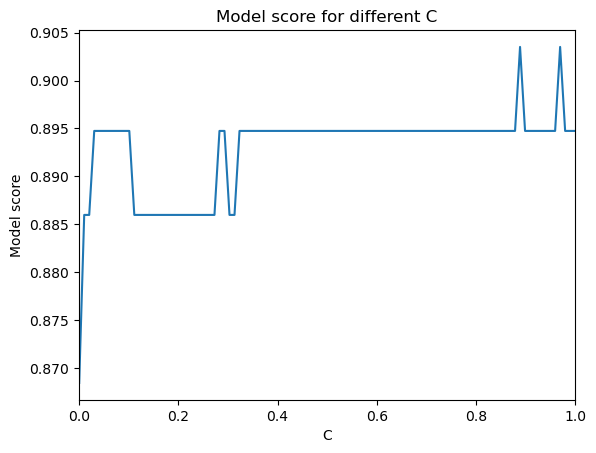

0.8888999999999999


In [285]:
ax = plt.gca()
ax.plot(c, score)
plt.axis('tight')
plt.xlabel('C')
plt.xlim([0,1])
plt.ylabel('Model score')
plt.title('Model score for different C')
plt.show()
print(best_c)

In [283]:
model = LogisticRegression(penalty='l2',max_iter=1000000,C=best_c)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9210526315789473